In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\marku\Desktop\ML\MLGit\datasets\airline.csv')

In [332]:
df.shape

(103904, 25)

In [333]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [335]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [336]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


# Cleaning the dataset

## Null-values

In [337]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [338]:
def handle_null_median(df):
    # Need to set inplace=True, so it doesn't create a copy of the dataframe. Tried without and this led to null-values not being removed
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

    return  df

# Sets null values equal to the mean of that column
def handle_null_mean(df):
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

    return  df

# Function to drop all rows with at least 1 null value. (Removes way to many rows, so isn't a good option)
def null_values_drop(df):
    df_copy = df.copy()
    df_drop = df_copy.dropna(axis=0, how='any')

    return df_drop

df = handle_null_mean(df)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Feature Selection

In [339]:
df = df.drop(columns=['satisfaction', 'Unnamed: 0', 'id', 'Arrival Delay in Minutes'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,25
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,11
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0


## Feature Engineering

In [340]:
df['Late Departure'] = 0
df.loc[df['Departure Delay in Minutes'] != 0, 'Late Departure' ] = 1
df = df.drop('Departure Delay in Minutes', axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Late Departure
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,1
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0


In [341]:
pd.cut(df['Flight Distance'], 10)

0          (26.048, 526.2]
1          (26.048, 526.2]
2         (1021.4, 1516.6]
3          (526.2, 1021.4]
4          (26.048, 526.2]
                ...       
103899     (26.048, 526.2]
103900    (2011.8, 2507.0]
103901    (1516.6, 2011.8]
103902     (526.2, 1021.4]
103903    (1516.6, 2011.8]
Name: Flight Distance, Length: 103904, dtype: category
Categories (10, interval[float64, right]): [(26.048, 526.2] < (526.2, 1021.4] < (1021.4, 1516.6] < (1516.6, 2011.8] ... (3002.2, 3497.4] < (3497.4, 3992.6] < (3992.6, 4487.8] < (4487.8, 4983.0]]

In [342]:
# Got the idea of splitting age into bins from: https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier, but seems like a common practice called Binning, where you put a range of values into a bin
def bins(df): # This is kind of feature engineering as well
    df['FlightDistanceGroup'] = 0
    df.loc[df['Flight Distance'] < 526.2, 'FlightDistanceGroup' ] = 0
    df.loc[(df['Flight Distance'] >= 526.2) & (df['Flight Distance'] < 1021.4), 'FlightDistanceGroup'] = 1
    df.loc[(df['Flight Distance'] >= 1021.4) & (df['Flight Distance'] < 1516.6), 'FlightDistanceGroup'] = 2
    df.loc[(df['Flight Distance'] >= 1516.6) & (df['Flight Distance'] < 2011.8), 'FlightDistanceGroup'] = 3
    df.loc[(df['Flight Distance'] >= 2011.8) & (df['Flight Distance'] < 2507.0), 'FlightDistanceGroup'] = 4
    df.loc[(df['Flight Distance'] >= 2507) & (df['Flight Distance'] < 3002.2), 'FlightDistanceGroup'] = 5
    df.loc[(df['Flight Distance'] >= 3002.2) & (df['Flight Distance'] < 3497.4), 'FlightDistanceGroup'] = 6
    df.loc[(df['Flight Distance'] >= 3497.4) & (df['Flight Distance'] < 3992.6), 'FlightDistanceGroup'] = 7
    df.loc[(df['Flight Distance'] >= 3992.6) & (df['Flight Distance'] < 4487.8), 'FlightDistanceGroup'] = 8
    df.loc[df['Flight Distance'] >=  4487.8, 'FlightDistanceGroup'] = 4

    df = df.drop(columns=['Flight Distance'])

    return df

## Encoding

In [343]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [344]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [345]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [346]:
df['Gender'] = df['Gender'].replace(['Female', 'Male'], [0,1])
df['Customer Type'] = df['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [0,1])
df['Type of Travel'] = df['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0,1])
df['Class'] = df['Class'].replace(['Eco Plus', 'Business', 'Eco'], [0,1,2])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Late Departure
0,1,0,13,0,0,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,1
1,1,1,25,1,1,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,1
2,0,0,26,1,1,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0
3,0,0,25,1,1,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,1
4,1,0,61,1,1,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,1,2,192,2,1,2,3,...,2,2,2,3,1,4,2,3,2,1
103900,1,0,49,1,1,2347,4,4,4,4,...,4,5,5,5,5,5,5,5,4,0
103901,1,1,30,1,1,1995,1,1,1,3,...,1,5,4,3,2,4,5,5,4,1
103902,0,1,22,1,2,1000,1,1,1,5,...,1,1,1,4,5,1,5,4,1,0


## Normalizing

In [347]:
def min_max_normalizing(df):
    df['Flight Distance'] = (df['Flight Distance'] - df['Flight Distance'].min()) / \
                      (df['Flight Distance'].max() - df['Flight Distance'].min())

    df['Departure Delay in Minutes'] = (df['Departure Delay in Minutes'] - df['Departure Delay in Minutes'].min()) / \
                      (df['Departure Delay in Minutes'].max() - df['Departure Delay in Minutes'].min())

    df['Arrival Delay in Minutes'] = (df['Arrival Delay in Minutes'] - df['Arrival Delay in Minutes'].min()) / \
                      (df['Arrival Delay in Minutes'].max() - df['Arrival Delay in Minutes'].min())

    return df

# Z-score Normalizing
def z_score_normalizing(df):
    df['Flight Distance'] = (df['Flight Distance'] - df['Flight Distance'].mean()) / df['Flight Distance'].std()

    df['Departure Delay in Minutes'] = (df['Departure Delay in Minutes'] - df['Departure Delay in Minutes'].mean()) / df['Departure Delay in Minutes'].std()

    df['Arrival Delay in Minutes'] = (df['Arrival Delay in Minutes'] - df['Arrival Delay in Minutes'].mean()) / df['Arrival Delay in Minutes'].std()

    return df

df = bins(df)
df

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Late Departure,FlightDistanceGroup
0,1,0,13,0,0,3,4,3,1,5,...,5,5,4,3,4,4,5,5,1,0
1,1,1,25,1,1,3,2,3,3,1,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,1,1,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0,2
3,0,0,25,1,1,2,5,5,5,2,...,2,2,2,5,3,1,4,2,1,1
4,1,0,61,1,1,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,1,2,2,1,2,3,2,...,2,2,3,1,4,2,3,2,1,0
103900,1,0,49,1,1,4,4,4,4,2,...,5,5,5,5,5,5,5,4,0,4
103901,1,1,30,1,1,1,1,1,3,4,...,5,4,3,2,4,5,5,4,1,3
103902,0,1,22,1,2,1,1,1,5,1,...,1,1,4,5,1,5,4,1,0,1


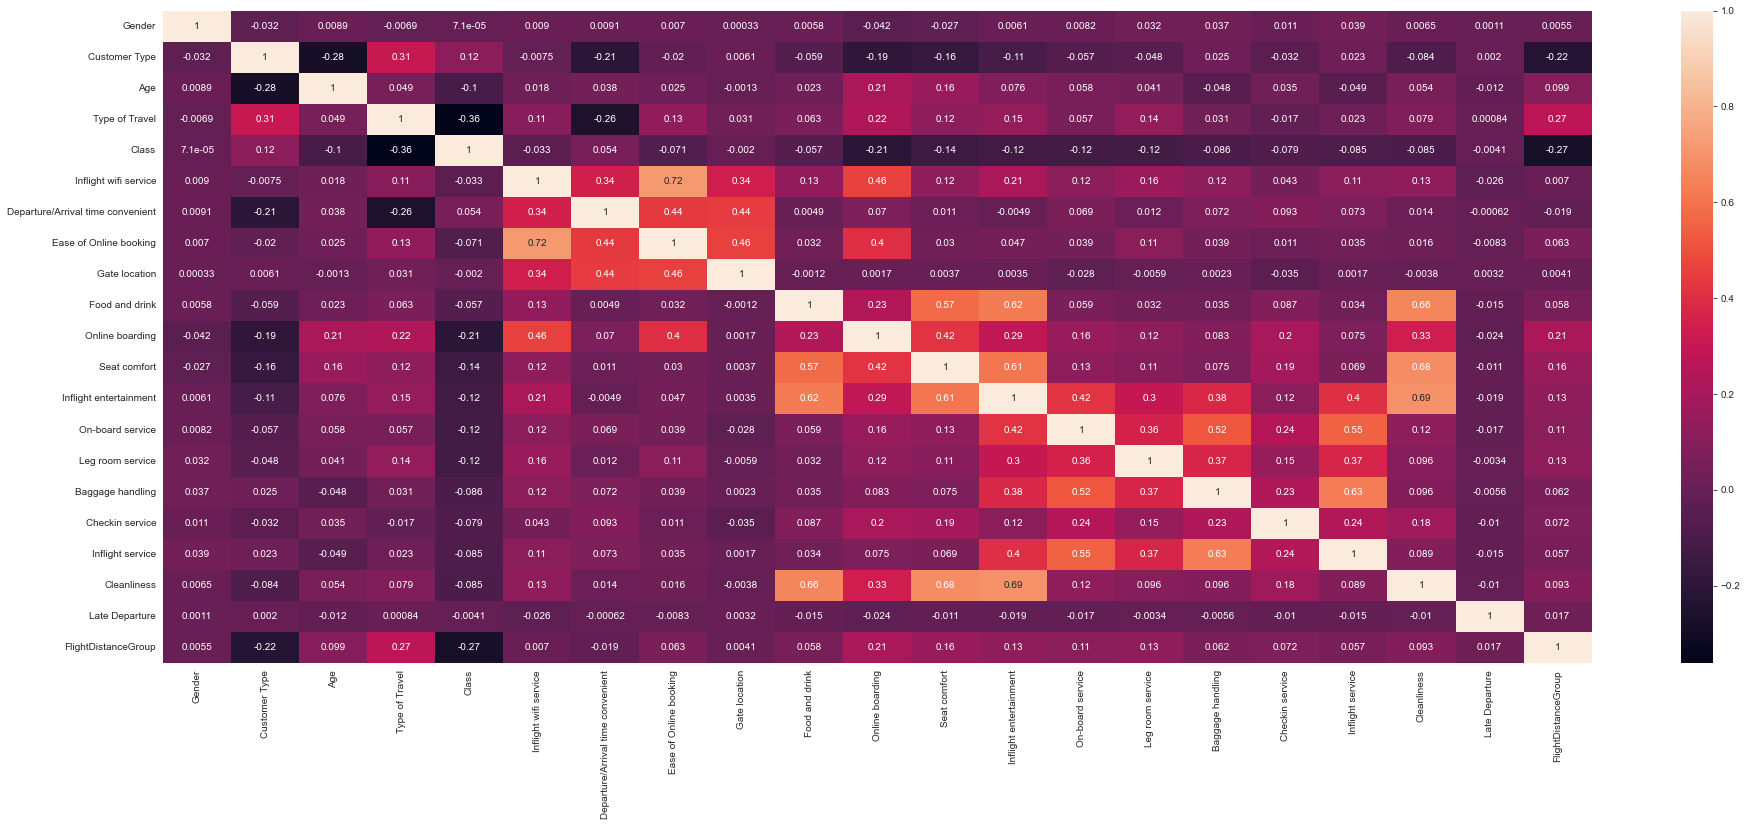

In [348]:
corr = df.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

In [349]:
df_distribution = df.drop(['Gender', 'Customer Type', 'Type of Travel'], axis=1)

C:\Users\marku\AppData\Local\Temp\ipykernel_10204\1504773410.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_distribution.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>],
       [<AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>],
       [<AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>],
       [<AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Inflight service'}>,
        <AxesSubplot:title={'center':'Cleanliness'}>],
       [<AxesSubplot:title={'center':'Late Departure'}>,
 

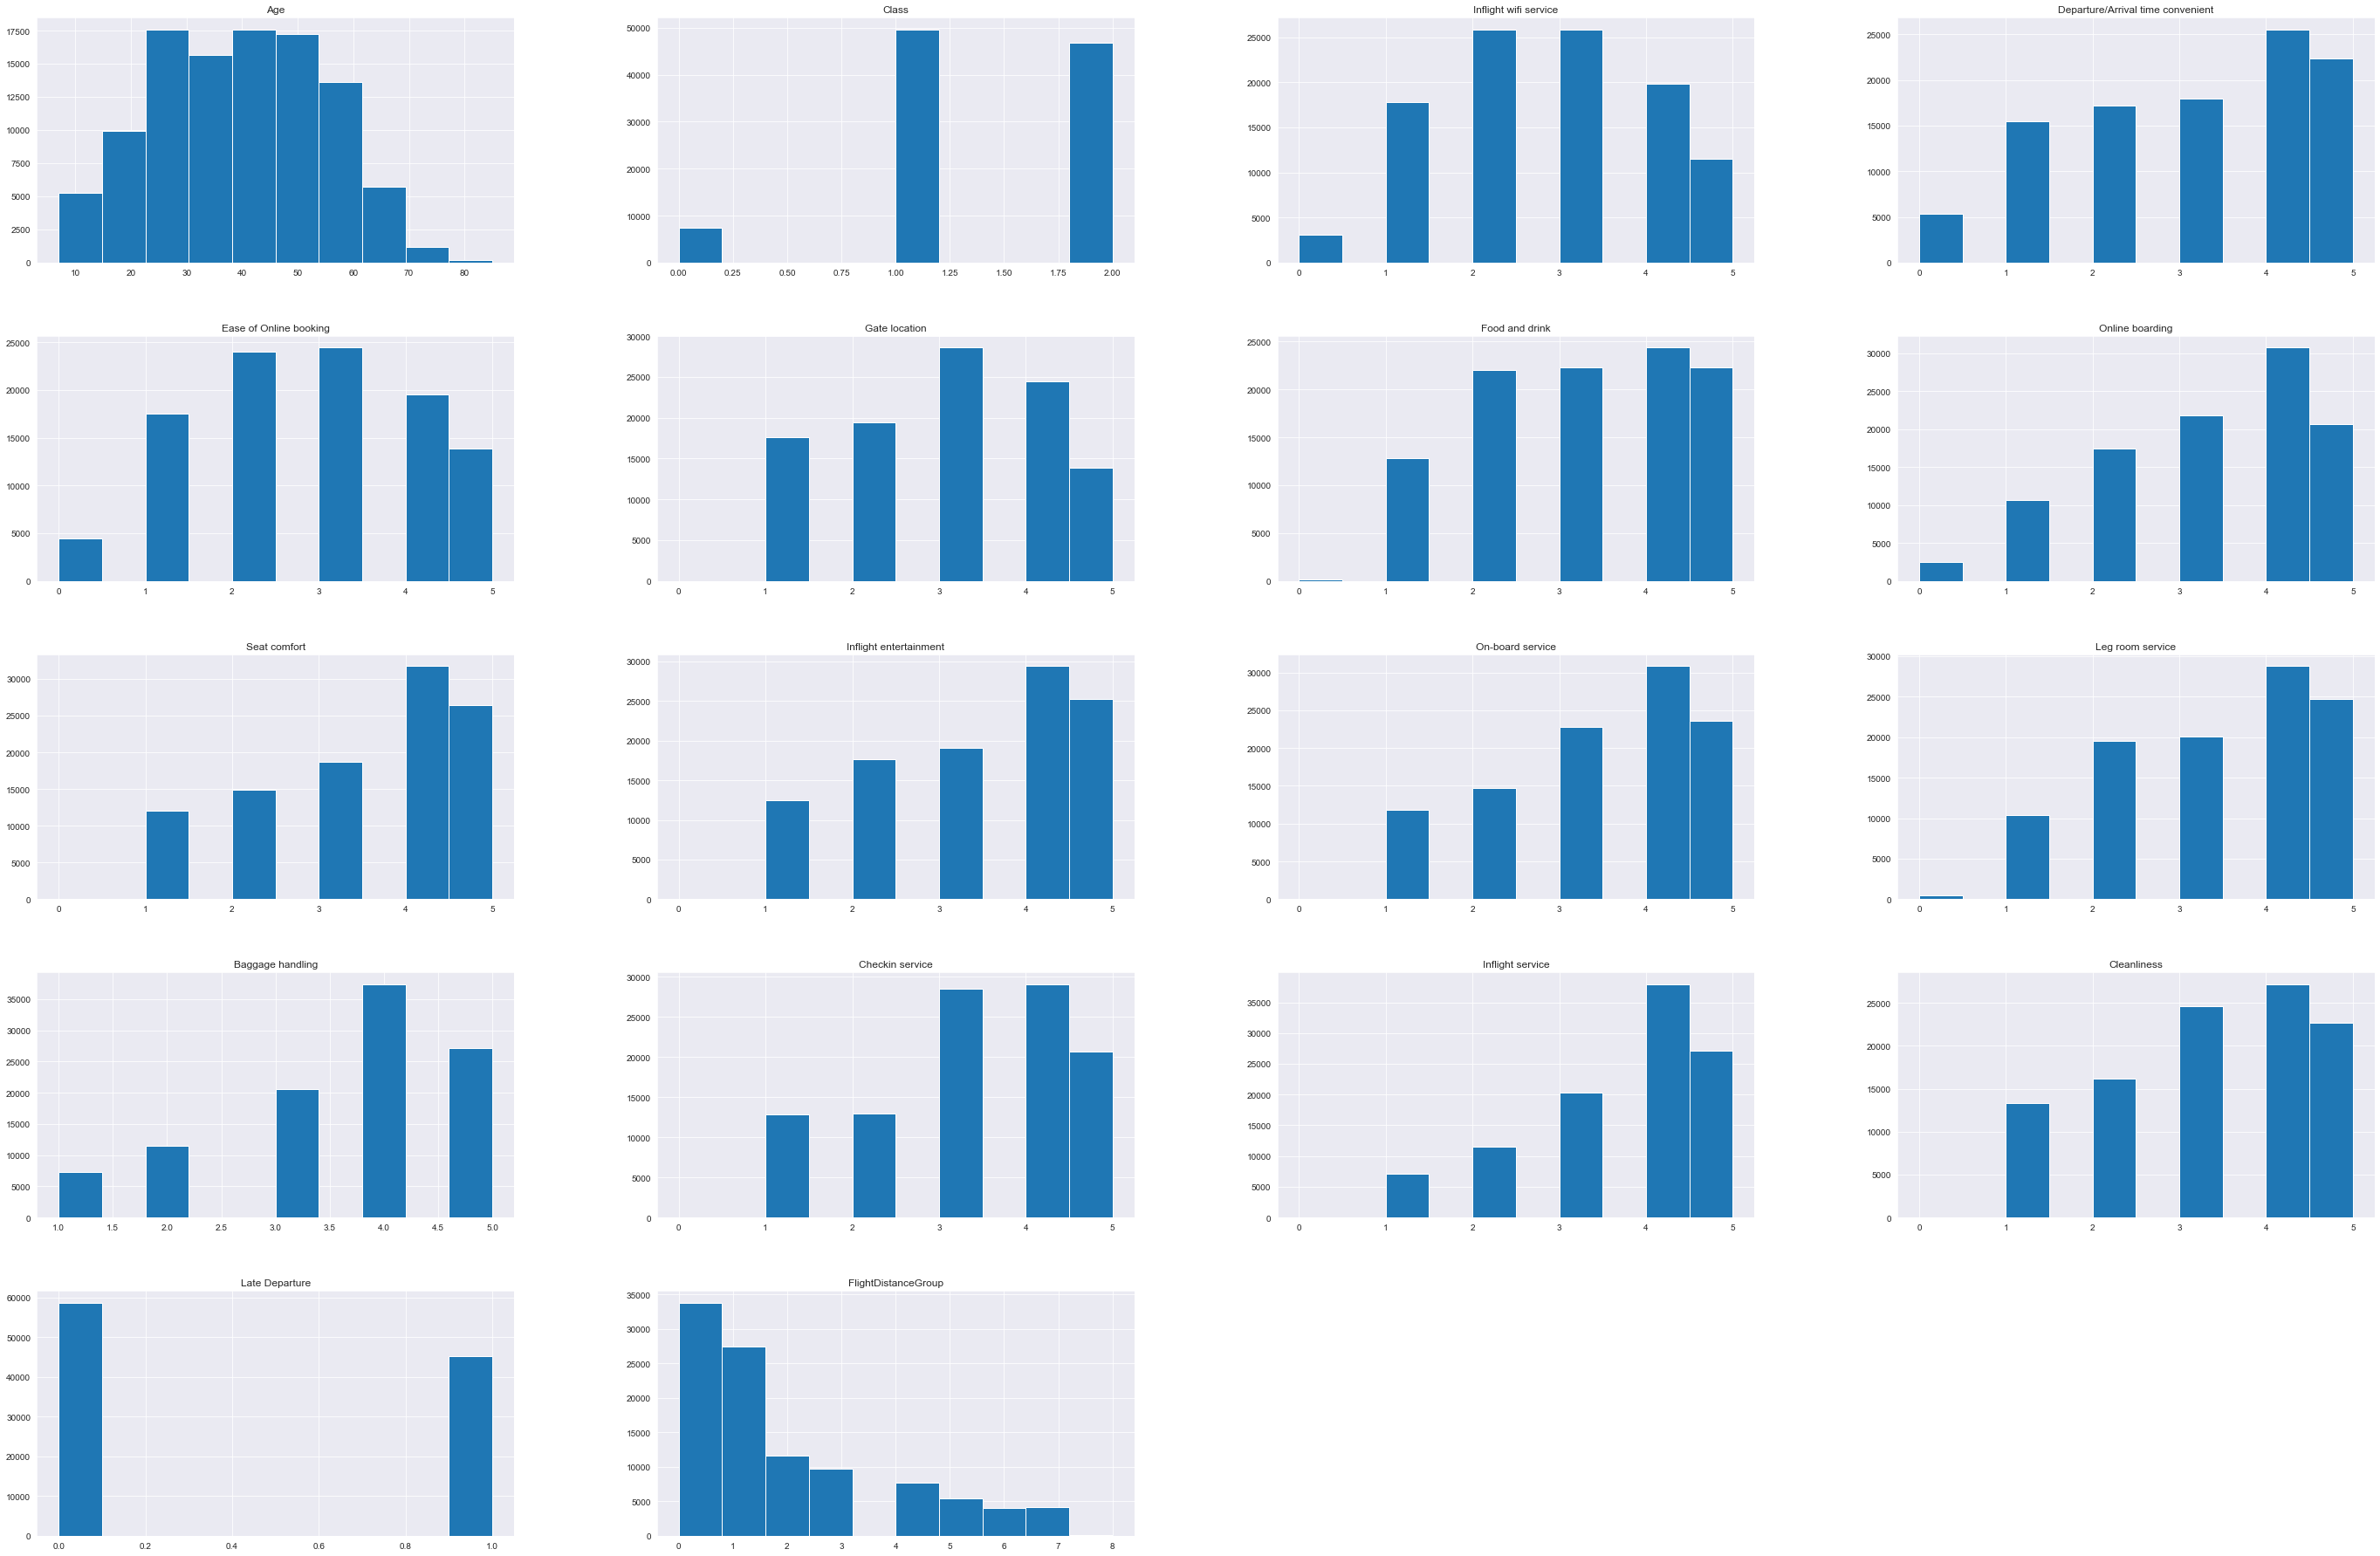

In [350]:
fig = plt.figure(figsize = (48,32))
ax = fig.gca()
df_distribution.hist(ax = ax)

Here you can see that most columns are leaning to the right, indicating that the average grade is above 2.5

In [351]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Late Departure,FlightDistanceGroup
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.689627,1.377762,2.729683,3.060296,2.756901,2.976883,3.202129,...,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,0.435363,1.841238
std,0.499947,0.386404,15.114964,0.462649,0.615882,1.327829,1.525075,1.398929,1.277621,1.329533,...,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,0.495807,2.009436
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,1.000000
75%,1.000000,0.000000,51.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,3.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,8.000000


Pandas describe function is probablly the best EDA I can do for this dataset considering there is not a ground truth I can look for correlations with.
The grade columns have an average of around 3, which indicates that most customers are more satisified with the different services, then disatisfied.
Each services has scores ranging from 0 to 5.

# The Final Dataset

In [352]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Late Departure,FlightDistanceGroup
0,1,0,13,0,0,3,4,3,1,5,...,5,5,4,3,4,4,5,5,1,0
1,1,1,25,1,1,3,2,3,3,1,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,1,1,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0,2
3,0,0,25,1,1,2,5,5,5,2,...,2,2,2,5,3,1,4,2,1,1
4,1,0,61,1,1,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,1,2,2,1,2,3,2,...,2,2,3,1,4,2,3,2,1,0
103900,1,0,49,1,1,4,4,4,4,2,...,5,5,5,5,5,5,5,4,0,4
103901,1,1,30,1,1,1,1,1,3,4,...,5,4,3,2,4,5,5,4,1,3
103902,0,1,22,1,2,1,1,1,5,1,...,1,1,4,5,1,5,4,1,0,1


# Splitting the Dataset

In [353]:
train = df.sample(frac=0.6)
val_test = df.drop(train.index)
val = val_test.sample(frac=0.5)
test = val_test.drop(val.index)